In [200]:
def updatepart(n1):
    Rexpt[n1,:]=0
    for i in range(ns): ##calc expectations
        Rexpt[n1,:] += psi[n1,i]*Rexp[i,:]
    #print "Rexpt",Rexpt[n1,:]
    Spsi = np.zeros(ns)
    Sdot = np.zeros((ns,nx))
    for n2 in range(N): ##loop over other particles

        if n2 != n1:
            dx = loc[n2,:]-loc[n1,:]
            #print "dx:", dx
            dsq = np.sum(dx**2)
            #print "dsq:", dsq
            for i in range(ns): ##loop over scents
                Spsi[i] += psi[n2,i]*np.exp(-0.5*dsq)
                #print "Spsi:", Spsi
                #Sdot = np.zeros(nx)
                for j in range(nx): ##loop over dimensions
                    Sdot[i,j] += (psi[n2,i]*dx[j]*np.exp(-0.5*dsq))
                
    for i in range(ns):
        #print "particle:",n1,"Sdot:",Sdot[i,:],"Spsi:",Spsi[i]
        R[n1,i,:] = Sdot[i,:]*Spsi[i]**-1            
        #print "R:",R[n1,i,:]
    vel[n1,:]=0
    acc[n1,:]=0
    mudot[n1,:]=0
    
    omega_R = np.random.normal(0,10**-2,4)
    omega_y = np.random.normal(0,10**-3,4)

    for i in range(ns):
        Rmag[n1,i] = np.abs(np.sqrt(np.sum(R[n1,i,:]**2))+omega_R[i])
        y[n1,i] = np.abs(psi[n1,i]+omega_y[i])
    
    for i in range(ns):
        for j in range(ns):
            mudot[n1,j] += -1*PI_R[i]*(Rexp[j,i]-Rmag[n1,i])*psi[n1,j]
            mudot[n1,j] += -1*PI_y[i]*(yexp[j,i]-y[n1,i])*psi[n1,j]
            for k in range(ns):
                mudot[n1,i] += PI_R[i]*(Rexp[k,i]-Rmag[n1,i])*psi[n1,j]*psi[n1,k]
                mudot[n1,i] += PI_y[i]*(yexp[k,i]-y[n1,i])*psi[n1,j]*psi[n1,k]
    for i in range(ns):
        mudot[n1,i] += -1*PI_mu[i]*mu[n1,i]

    for i in range(ns):
        vel[n1,:] += -1*psi[n1,i]*R[n1,i,:]/np.linalg.norm(R[n1,i,:])*PI_R[i]*(Rexpt[n1,i]-Rmag[n1,i])
        acc[n1,:] += R[n1,i,:]/np.linalg.norm(R[n1,i,:])*PI_R[i]*((Rexpt[n1,i]-Rmag[n1,i])*psi[n1,i]*(1-psi[n1,i])*mudot[n1,i]+omega_R[i]*labda**-1)
    

        

        #acc[n1,:] += labda**-1*R[n1,i,:]/np.linalg.norm(R[n1,i,:])*PI_R[i]*((Rexpt[n1,i]-Rmag[n1,i])*psi[n1,i]*(1-psi[n1,i])+labda**-1*psi[n1,i])
        #print "particle",n1,"scent",i,"vel:",vel[n1,:], "acc:", acc[n1,:]
        print "time:",t,"particle:",n1,"scent:",i,"errorR:",(Rexpt[n1,i]-Rmag[n1,i])
    #print "Rmag:", Rmag[n1,:]

time: 0 particle: 0 scent: 0 errorR: 1.1771041630615775
time: 0 particle: 0 scent: 1 errorR: 2.585686764974545
time: 0 particle: 1 scent: 0 errorR: 1.1752875987066411
time: 0 particle: 1 scent: 1 errorR: 2.599103374357521
time: 0 particle: 2 scent: 0 errorR: 2.601217766967249
time: 0 particle: 2 scent: 1 errorR: 1.174858836818872
time: 0 particle: 3 scent: 0 errorR: 2.601120539606577
time: 0 particle: 3 scent: 1 errorR: 1.1688430117702762
loc: 0 [ 1.08323767 -1.08323767]
vel: 0 [ 0.83233844 -0.83233844]
psi: 0 [9.9999968e-01 3.1951665e-07]
loc: 1 [-1.08311742  1.08311742]
vel: 1 [-0.83105393  0.83105393]
psi: 1 [9.99999680e-01 3.20406265e-07]
loc: 2 [1.08308829 1.08308829]
vel: 2 [0.83075075 0.83075075]
psi: 2 [3.20580640e-07 9.99999679e-01]
loc: 3 [-1.08265859 -1.08265859]
vel: 3 [-0.82649692 -0.82649692]
psi: 3 [3.20571430e-07 9.99999679e-01]
time: 1 particle: 0 scent: 0 errorR: 0.9530292375888321
time: 1 particle: 0 scent: 1 errorR: 2.4779060222099965
time: 1 particle: 1 scent: 0 er

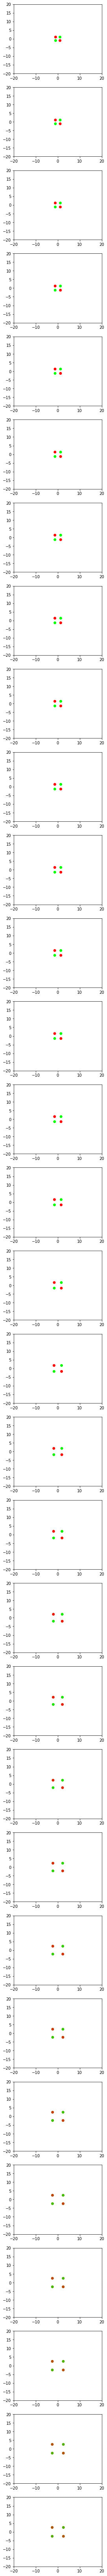

In [202]:
import numpy as np
global ns,nx,N,R,Rmag,Rexpt,Rexp,y,yexp
global loc,vel,acc,psi,mu,mudot, PI_R, PI_mu
ns = 2
nx = 2
N=4

psi = np.zeros((N,ns))
mu = np.zeros((N,ns))
mudot = np.zeros((N,ns))

loc = np.zeros((N,nx))
vel = np.zeros((N,nx))
acc = np.zeros((N,nx))

inff = 10**-7

psi[0,:] = [1-inff,inff]
psi[1,:] = [1-inff,inff]
psi[2,:] = [inff,1-inff]
psi[3,:] = [inff,1-inff]

mu = np.log(psi)

loc[0,:] = [1,-1]
loc[1,:] = [-1,1]

loc[2,:] = [1,1]
loc[3,:] = [-1,-1]

D = 4

R = np.zeros((N,ns,nx))
Rmag = np.zeros((N,ns))
Rexp = np.zeros((ns,ns))
Rexp[0,:] = [D,D]
Rexp[1,:] = [D,D]
y = np.zeros((N,ns))
yexp = np.identity(ns)*(1-inff)+(1-np.identity(ns))*inff*(ns-1)**-1

PI_R = np.ones(ns)*1
PI_y = np.ones(ns)
PI_mu = np.ones(ns)*0.4
dt = 0.1

Rexpt = np.zeros((N,ns))
labda = 10.0

T = 30
plt.figure(figsize=(4,T*4))
plt.subplot(T+1,1,1)
color = np.zeros((N,3))
color[:,0]= psi[:,0]
color[:,1]= psi[:,1]
plt.scatter(loc[:,0],loc[:,1],c=color)
lim = 20
plt.xlim([-lim,lim])
plt.ylim([-lim,lim])

for t in range(T):
    for n1 in range(N): ##loop over particles
        updatepart(n1)
    loc = loc + dt*vel + dt**2*acc
    mu = mu + dt*mudot
    psi = np.transpose((np.transpose(np.exp(mu)))/np.sum(np.exp(mu),axis=1))
    
    for n1 in range(N):
        print "loc:",n1,loc[n1,:]
        print "vel:",n1,vel[n1,:]
        print "psi:",n1,psi[n1,:]
    plt.subplot(T+1,1,t+2)
    color = np.zeros((N,3))
    color[:,0]= psi[:,0]
    color[:,1]= psi[:,1]

    plt.scatter(loc[:,0],loc[:,1],c=color)
    plt.xlim([-lim,lim])
    plt.ylim([-lim,lim])
                    
    
    

if 0:
    #def calcforce():
    for i in range(ns):
        for j in range(ns):
            for k in range(nx):
                print "hi"
                #vel[k] = divR*

In [212]:
import matplotlib.pyplot as plt
% matplotlib inline

updatepart(3)

time: 29 particle: 3 scent: 0 errorR: 0.39549227454622704
time: 29 particle: 3 scent: 1 errorR: 0.3924692485234993
